## Ejemplo: Simulación de un conjunto de datos de enfermedades raras (conjunto de datos no balanceado)
Construyamos un clasificador para predecir una enfermedad rara (codificada como "1").

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

np.random.seed(23)

# Simular/generar conjunto de datos on dos clases, 1000 sanos y 100 enfermos
# we create two clusters of random points
n_healthy = 1000
n_rare_disease = 100

centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_healthy, n_rare_disease],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# Classification
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = LogisticRegression() # clasificador
clf.fit(X_train, y_train)
print(
    # See the new score function
    f"Test accuracy is {clf.score(X_test, y_test)}"
)
# La precision es bastante alta, pero en verdad es basura
# Cuando las clases/conjuntos estan desbalanceadas, los clasificadores no funcionan bien si no se toman medidas

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## Ejemplo: Matriz de confusión
La precisión parece buena, pero el clasificador no está haciendo un buen trabajo... Para apreciarlo, usaremos la **matriz de confusión**:

Por definición, una matriz de confusión C es tal que $C_{ij}$ es igual a la cantidad de observaciones que se sabe que están en el grupo i y se predice que estarán en el grupo j.

[[256   1]
 [  8  10]]


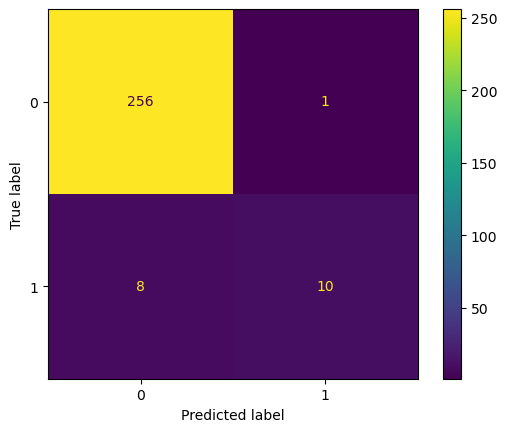

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de 2x2 con true  y  predicted
# Se ve como el clasificador no es bueno
y_pred = clf.predict(X_test) # con el conjunto de test
print(
    confusion_matrix(y_test, y_pred) # crea la matriz en formato numerico
)
# or 
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred) # grafica  

Podemos extraer métricas relevantes como **precision** y **recall** de la matriz de confusión. (Fíjate, ¿qué son esas etiquetas `macro avg` y`weighted avg`????).

In [4]:
from sklearn.metrics import classification_report
print(
    classification_report(y_test, clf.predict(X_test)) # metricas
)
# interesa predecir la enfermedad rara (clase 1)
# existe l fila 0 porque definir falso positivo es ambiguo
# esto depende de la etiqueta que se considere positiva (contexto medico suele ser en enfermedad)
# ultimas filas (avgs) es de hacer media de las columnas. weighted avg es ponderado por el numero de ejemplos de cada clase

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       257
           1       0.91      0.56      0.69        18

    accuracy                           0.97       275
   macro avg       0.94      0.78      0.84       275
weighted avg       0.97      0.97      0.96       275



## Ejemplo: Cambiar el umbral de decisión y la curva ROC

In [ ]:

clf = LogisticRegression()
clf.fit(X_train, y_train)

# Change this threshold to see how it affects the confusion matrix
threshold = 0.2 # umbral que se puede modificar segun intereses
# podriamos mirar todas las opciones a mano, pero la curva ROC automaticamente lo hace
y_pred = (clf.predict_proba(X_test)[:, 1:] >= threshold).astype(int)
print(
    confusion_matrix(y_test, y_pred)
)

[[240  17]
 [  1  17]]


In [6]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

(clf.predict_proba(X_test)[:,1:] >= 0.2).astype(int) # probabilidad de cada clase
# primer numero p de pertenencia a clase 0 y segundo a clase 1

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

La **curva ROC** es una forma de visualizar cómo se ven afectados el TPR y el FPR por todos los umbrales posibles. A partir de esta curva, se puede derivar una nueva métrica: el **AUC-ROC**

Text(0.5, 1.0, 'ROC curve (AUC=0.98)')

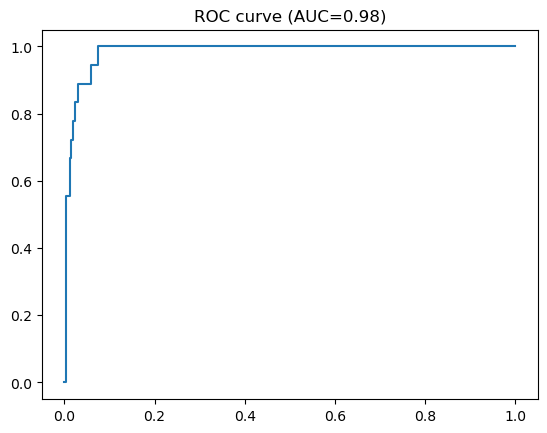

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# mirar que tal funciona nuestro clasificador con todos los thresholds posibles
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score) # devuelve FPR, TPR y thresholds
roc_auc = roc_auc_score(y_test, y_score) # area bajo la curva ROC (AUC en grafica)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr) # pasamos los valores de FPR y TPR (eje x e y)
plt.title(f"ROC curve (AUC={roc_auc:.2f})")

# Mejor usamos AOC como metrica en vez de accuracy
# Con ayuda de los expertos se elige el threshold adecuado para su caso

## Ejemplo: uso de ponderación de clase para clasificación desequilibrada

In [8]:
clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)
print(
    f"Test accuracy is {clf.score(X_test, y_test)}"
)
print(
    confusion_matrix(y_test, clf.predict(X_test))
)

print(
    classification_report(y_test, clf.predict(X_test))
)

Test accuracy is 0.9054545454545454
[[231  26]
 [  0  18]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       257
           1       0.41      1.00      0.58        18

    accuracy                           0.91       275
   macro avg       0.70      0.95      0.76       275
weighted avg       0.96      0.91      0.92       275

